In [1]:
import pandas as pd
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter

from collections import OrderedDict
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df = pd.read_csv('comments_matrix.csv')

In [2]:
comment_string = " ".join(comment for comment in df["Comments"])

In [3]:
comment_string

"['mann', 'arte', 'einfach', 'kommentare', 'mehr', 'durchlesen', 'verschwrungstheoretiker', 'religise', 'prediger', 'stoen'] ['menschheit', 'ziemlich', 'schlecht', 'gemacht', 'naja', 'soviel', 'zerstrung', 'natur', 'fr', 'film', 'kauf', 'genommen', 'wurde', 'wunderwas', 'fr', 'affen'] ['knnte', 'denken', 'alien', 'doku', 'propaganda', 'gemacht'] ['rassismus', 'menschen'] ['genauso', 'kindern', 'schule', 'vermittelt', 'schne', 'doku', 'leider', 'darstellungsweise', 'liebend', 'gerne', 'stunden', 'lang', 'sowas', 'reinziehen', 'gut'] ['ganzen', 'zahlenangaben', 'reiner', 'bulshitvermutungen', 'haaren', 'herbeigezogene', 'theorienalles', 'blo', 'wissenschaft'] ['trotzdem', 'beherrschen', 'arten'] ['fehler', 'sonnensystem', 'befindet', 'rande', 'galaxy'] ['schei', 'artenwo', 'penner'] ['mensch', 'eliten'] ['gute', 'doku', 'wer', 'htte', 'gedacht', 'ende', 'doku', 'mal', 'politischen', 'leitfaden', 'bringen', 'macht', 'traurig', 'immer', 'politik', 'meinungsmache', 'geht', 'deshalb', 'schau

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

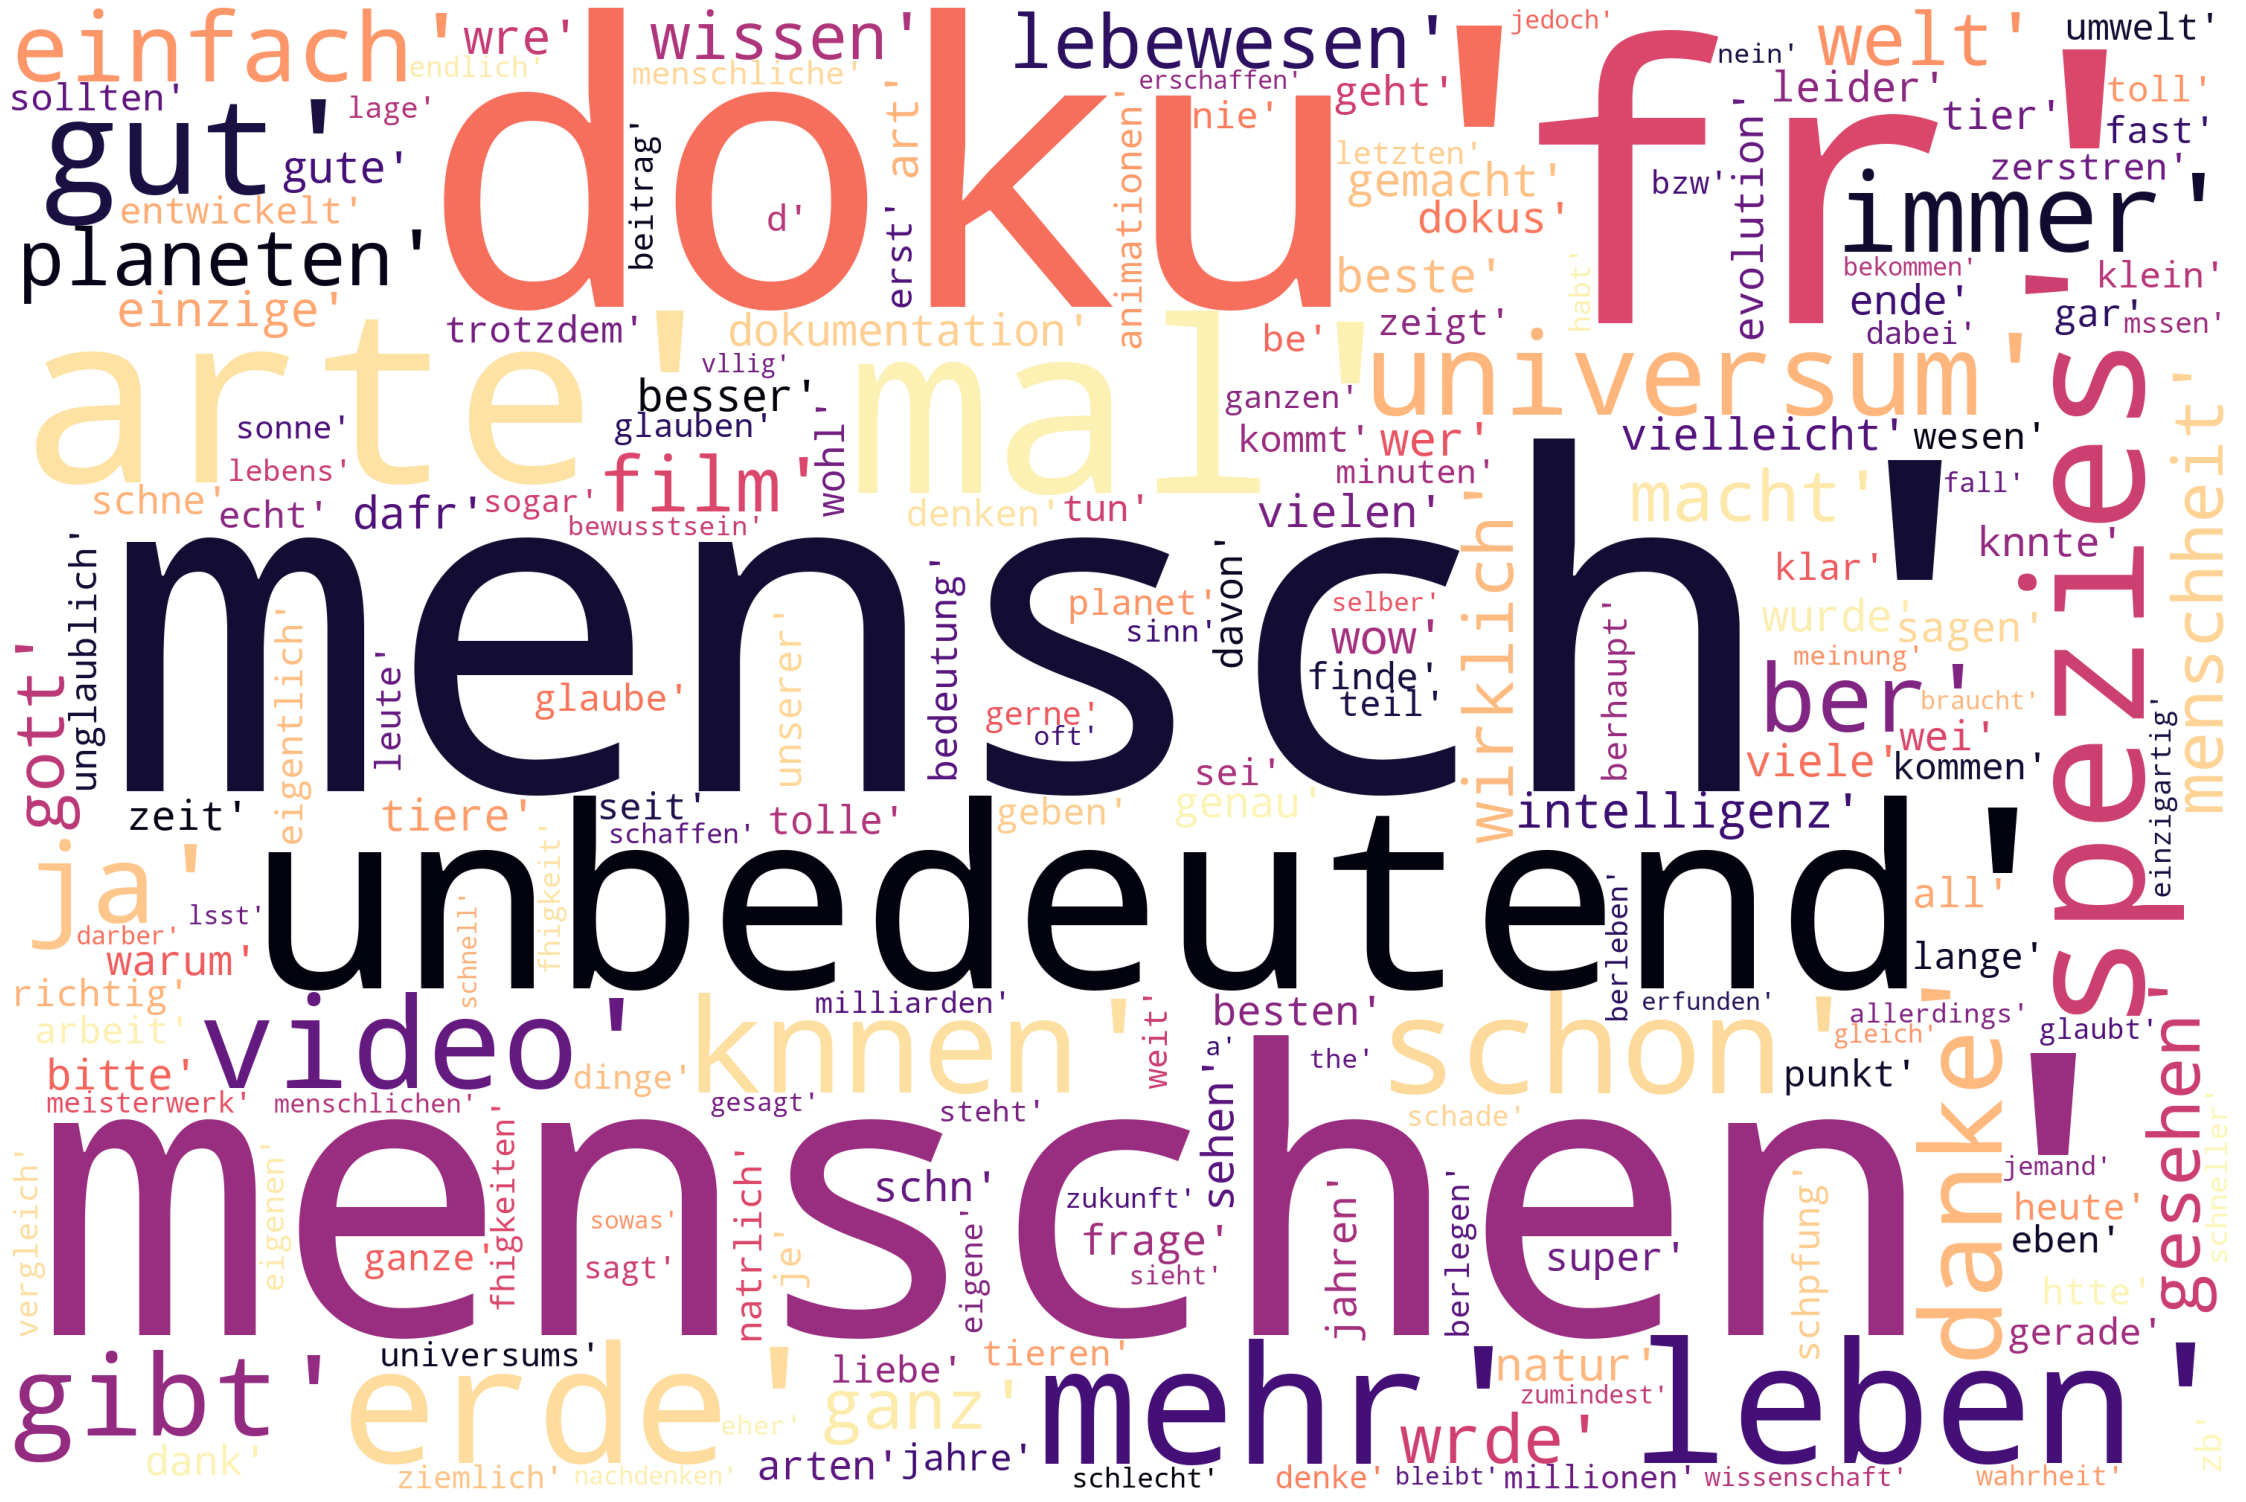

In [5]:
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='magma', collocations=False).generate(comment_string)
# Plot
plot_cloud(wordcloud)

In [7]:
import cv2

cv2.imwrite('arte_wc.jpg', plot_cloud)

TypeError: Expected Ptr<cv::UMat> for argument 'img'

In [ ]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [ ]:
!pip3 install spacy

In [ ]:
!python3 -m spacy download de_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('de')

In [ ]:
df = pd.read_csv('NLP_analysis.csv')

In [ ]:
df.head()

In [ ]:
def pol_cat (row):
   if row['polarity'] == 1 :
      return 'positive'
   if row['polarity'] == 0 :
      return 'neutral'
   if row['polarity'] == -1:
      return 'negative'
   
   return 'Other'

In [ ]:
df.apply (lambda row: pol_cat(row), axis=1)


In [ ]:
df['pol_cat'] = df.apply (lambda row: pol_cat(row), axis=1)
df.head(3)

In [ ]:
df['parsed'] = df.Comments.apply(nlp)
df.head(3)

In [ ]:
df.to_csv('comments_parsed_cat.csv')


In [ ]:
print("Document Count")
print(df.groupby('pol_cat')['Comments'].count())
print("Word Count")
df.groupby('pol_cat').apply(lambda x: x.Comments.apply(lambda x: len(x.split())).sum())

In [ ]:
corpus = st.CorpusFromParsedDocuments(df, category_col='pol_cat', parsed_col='parsed').build()


In [ ]:
!pip install -U scattertext

In [ ]:
html = produce_scattertext_explorer(corpus,
                                    category='positive',
                                    category_name='Positive',
                                    not_category_name='Negative',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=df['Comments'])
file_name = 'output/ScattertextScale.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [ ]:
import pandas 
pandas.__version__